In [13]:
import pandas as pd
from tensorflow import keras
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path_file = 'archive/fire_dataset/fire_images/'
path_non_file = 'archive/fire_dataset/non_fire_images/'

2023-10-23 13:51:51.799448: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 13:51:51.944745: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-23 13:51:51.944844: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-23 13:51:51.944908: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-23 13:51:51.964929: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 13:51:51.966889: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [96]:
def load_images_tags(ruta, tag):
    images = []
    tags = []
    for archivo in os.listdir(ruta):
        ruta_completa = os.path.join(ruta, archivo)
        imagen = cv2.imread(ruta_completa)
        hsv_image = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
        hsv_image = cv2.resize(hsv_image, (150, 150))
        images.append(hsv_image)
        tags.append(tag)
    return images, tags

In [97]:
img_fire, tag_fire = load_images_tags(path_file, tag=1)

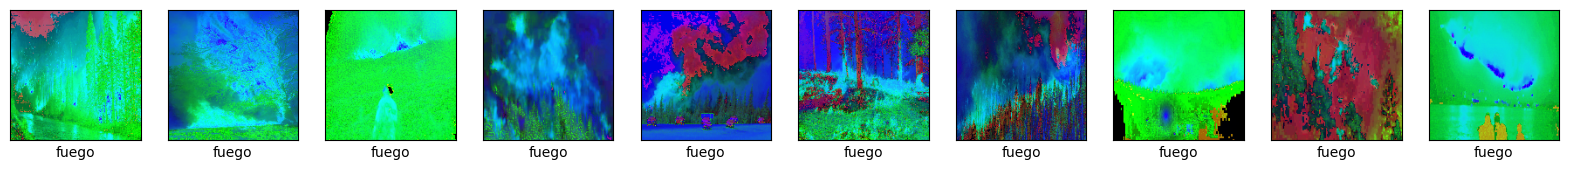

In [148]:
class_tags = ['normal','fuego']
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_fire[i])
    plt.xlabel(class_tags[tag_fire[i]])
plt.show()

In [106]:
img_non_fire, tag_non_fire = load_images_tags(path_non_file, tag=0)

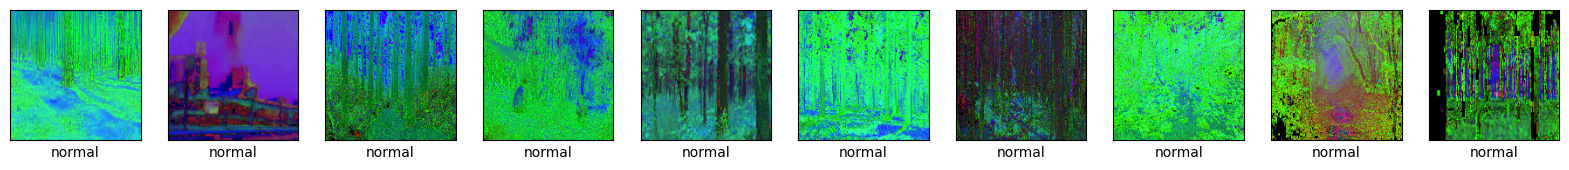

In [149]:
class_tags = ['normal','fuego']
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_non_fire[i])
    plt.xlabel(class_tags[tag_non_fire[i]])
plt.show()

In [108]:
# Combinar imágenes y etiquetas
Images = np.array(img_fire + img_non_fire)
Tags = np.array(tag_fire + tag_non_fire)

In [109]:
print(len(img_fire))
print(len(img_non_fire))
print(Images)
print(Tags)

755
243
[[[[177  58  96]
   [176  57  98]
   [176  54  97]
   ...
   [  9 181  12]
   [  6 180  31]
   [ 90 209  13]]

  [[172  72 101]
   [172  69  99]
   [173  55  97]
   ...
   [ 11 204  87]
   [ 15 223  19]
   [ 14 199  11]]

  [[177  68 102]
   [172  68 101]
   [176  63 101]
   ...
   [ 12 234 109]
   [ 11 180  15]
   [ 18 160   9]]

  ...

  [[ 90 108  24]
   [ 10 148  42]
   [128 140  43]
   ...
   [ 11 195  10]
   [ 11 217   9]
   [  0 145  11]]

  [[  3   2  11]
   [154 158   8]
   [ 51  86   9]
   ...
   [ 13 138  17]
   [  8 156  18]
   [  6 165  15]]

  [[ 63 127  17]
   [ 10 176  18]
   [ 13 158  14]
   ...
   [ 12 216  17]
   [  8 231  15]
   [  8 139  10]]]


 [[[ 14  82 183]
   [ 14  80 187]
   [ 13  77 189]
   ...
   [ 11  54 130]
   [ 10  53 138]
   [ 14  81 135]]

  [[ 14  80 187]
   [ 14  80 188]
   [ 14  79 191]
   ...
   [  8  61 131]
   [ 12  52 129]
   [ 12  51 150]]

  [[ 14  80 188]
   [ 14  80 188]
   [ 14  79 190]
   ...
   [ 12  59 128]
   [ 10  55 125]
   

In [110]:
class_tags = ['normal','fuego']

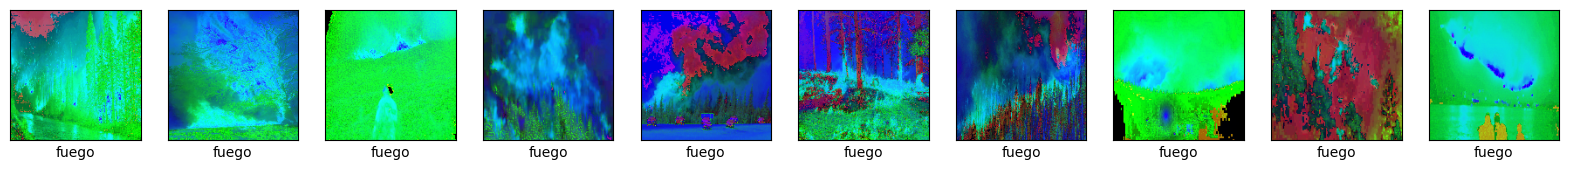

In [111]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Images[i])
    plt.xlabel(class_tags[Tags[i]])
plt.show()

In [112]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150,150,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2,activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Tags, epochs=100)

Epoch 1/100
32/32 [==============================] - 9s 205ms/step - loss: 2650.8259 - accuracy: 0.6733
Epoch 2/100
32/32 [==============================] - 6s 193ms/step - loss: 485.5005 - accuracy: 0.7335
Epoch 3/100
32/32 [==============================] - 7s 205ms/step - loss: 105.7841 - accuracy: 0.8226
Epoch 4/100
32/32 [==============================] - 7s 231ms/step - loss: 147.9648 - accuracy: 0.7936
Epoch 5/100
32/32 [==============================] - 6s 192ms/step - loss: 119.4103 - accuracy: 0.8196
Epoch 6/100
32/32 [==============================] - 5s 165ms/step - loss: 188.1871 - accuracy: 0.8056
Epoch 7/100
32/32 [==============================] - 6s 175ms/step - loss: 193.4786 - accuracy: 0.7996
Epoch 8/100
32/32 [==============================] - 8s 259ms/step - loss: 59.7281 - accuracy: 0.8858
Epoch 9/100
32/32 [==============================] - 8s 252ms/step - loss: 26.4623 - accuracy: 0.9208
Epoch 10/100
32/32 [==============================] - 6s 200ms/step - loss

In [18]:
class_name = ['normal','fuego']

nuevo = 'nuevo/'
file_nuevo = []
img_size = 150

In [8]:
def load_images(ruta):
    images_prueba = []
    for archivo in os.listdir(nuevo):
        ruta_completa = os.path.join(ruta, archivo)
        imagen = cv2.imread(ruta_completa)
        hsv_image = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
        hsv_image = cv2.resize(hsv_image, (150, 150))
        images_prueba.append(hsv_image)
    return images_prueba

In [45]:
Images_prueba = load_images(nuevo)
new_images_prueba = np.array(Images_prueba)

In [46]:
print(new_images_prueba.shape)

(13, 150, 150, 3)


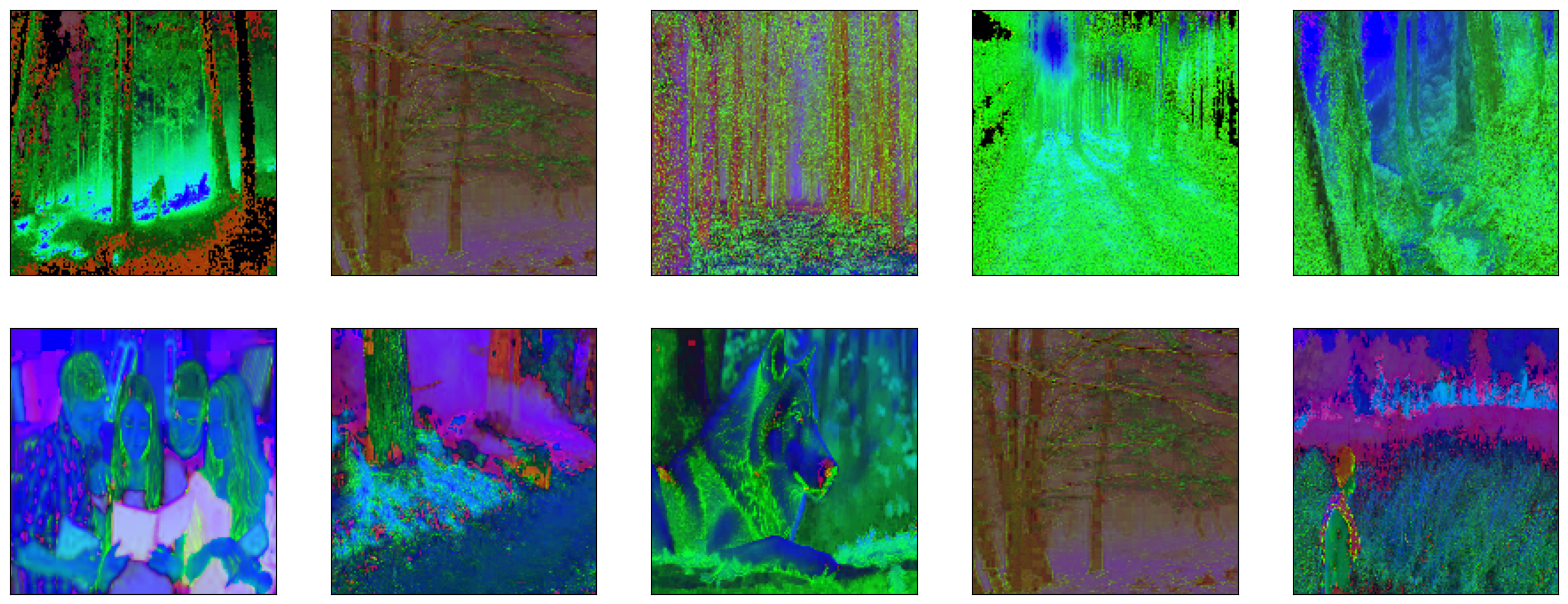

In [47]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(new_images_prueba[i])
plt.show()

1/1 [==============================] - 0s 145ms/step
[[0.0000000e+00 9.9999994e-01]
 [9.9999994e-01 0.0000000e+00]
 [9.9999994e-01 0.0000000e+00]
 [9.9999994e-01 0.0000000e+00]
 [9.9999994e-01 0.0000000e+00]
 [0.0000000e+00 9.9999994e-01]
 [0.0000000e+00 9.9999994e-01]
 [9.9999994e-01 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [1.0904027e-09 1.0000000e+00]]
[0.         0.99999994]
13.0
16


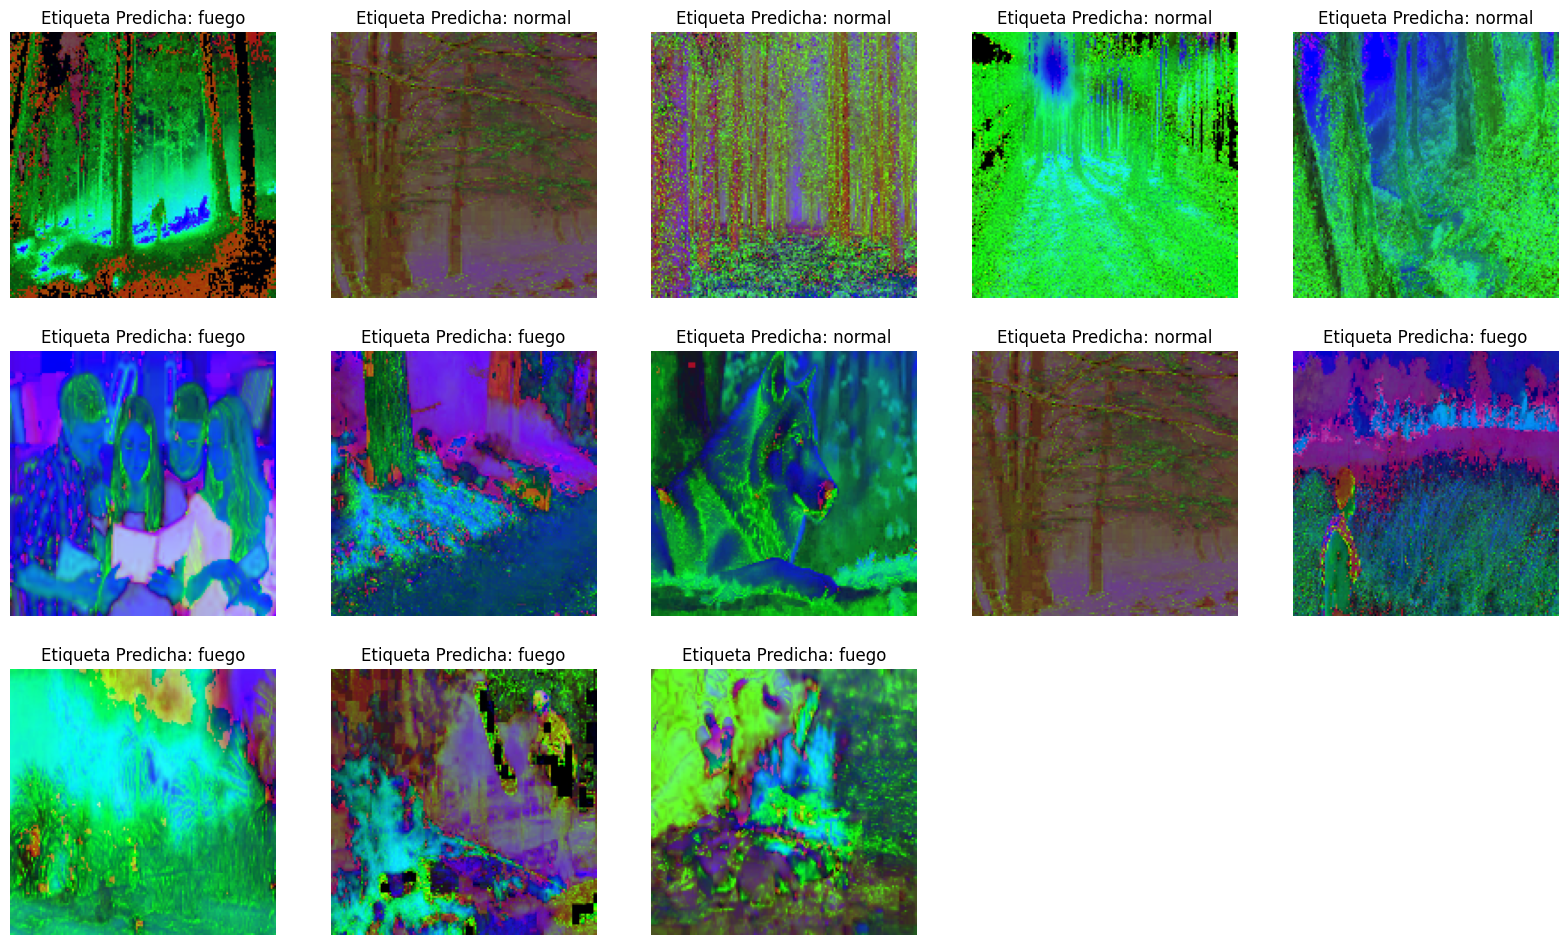

In [53]:
model = keras.models.load_model('modelo_fuego_hsv.h5')
prediction_simple = model.predict(new_images_prueba)

print(prediction_simple)
print(prediction_simple[0])
print(np.sum(prediction_simple))
print(np.argmax(prediction_simple))

plt.figure(figsize=(20,20))
for i, (probabilidad) in enumerate(zip(prediction_simple)):
    plt.subplot(5,5,i+1)
    plt.imshow(new_images_prueba[i])
    plt.title(f'Etiqueta Predicha: {class_name[np.argmax(probabilidad)]}')
    plt.axis('off')

plt.show()
 

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

tags_real = [1,0,0,0,0,0,1,0,0,1,1,1,1] 
clases_predichas = []

for probabilidad in prediction_simple:
    clase_predicha = 0 if probabilidad[0] > 0.5 else 1
    clases_predichas.append(clase_predicha)

precision = accuracy_score(tags_real, clases_predichas)

precision = precision_score(tags_real, clases_predichas)
recuperacion = recall_score(tags_real, clases_predichas)
puntuacion_f1 = f1_score(tags_real, clases_predichas)
matriz_confusion = confusion_matrix(tags_real, clases_predichas)

print("Precisión:", precision)
print("Recuperación:", recuperacion)
print("Puntuación F1:", puntuacion_f1)
print("Matriz de Confusión:")
print(matriz_confusion)

Precisión: 0.8571428571428571
Recuperación: 1.0
Puntuación F1: 0.923076923076923
Matriz de Confusión:
[[6 1]
 [0 6]]


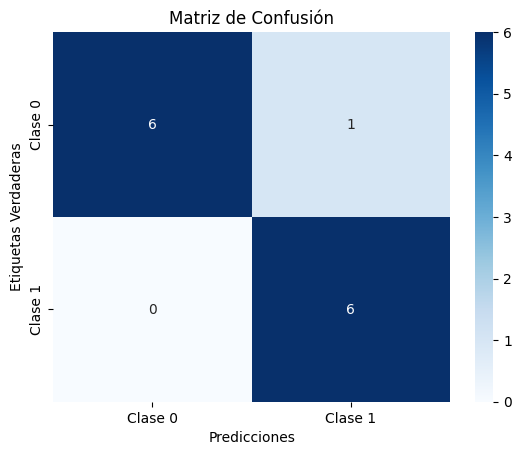

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matriz_confusion = confusion_matrix(tags_real, clases_predichas)

# Crea un mapa de calor para visualizar la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'])

plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

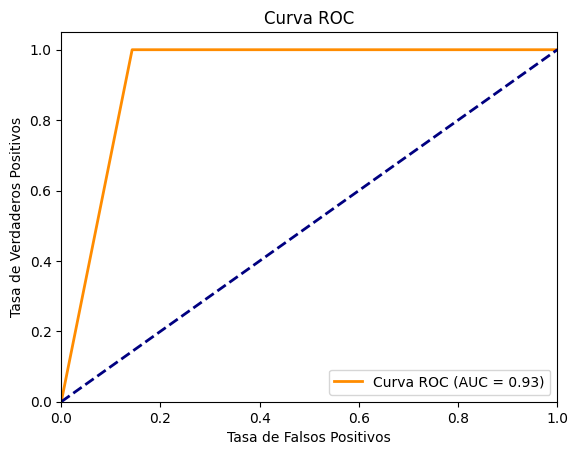

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(tags_real, clases_predichas)
roc_auc = roc_auc_score(tags_real, clases_predichas)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [21]:
file_unic = './nuevo/fire.9.png'

def load_image(ruta):
    imagen = cv2.imread(ruta)
    hsv_image = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    hsv_image = cv2.resize(hsv_image, (150, 150))
    return hsv_image


[[[  0   0  11]
  [  0   0  18]
  [  0   0  15]
  ...
  [ 13 102  17]
  [ 11 100  20]
  [ 13 120  19]]

 [[  0   0   8]
  [ 30 102   5]
  [115  53  29]
  ...
  [ 11 113  18]
  [ 12 107  20]
  [  7 140  25]]

 [[  0   0   9]
  [112  93  41]
  [120  29  17]
  ...
  [  0  64  24]
  [ 13  70  25]
  [  6  62  20]]

 ...

 [[  6 105  12]
  [ 13 197   9]
  [165  53  10]
  ...
  [ 20  81   9]
  [  7 103  12]
  [ 20  61  12]]

 [[140  64  12]
  [  7 105  13]
  [ 24 106  12]
  ...
  [  6  98  13]
  [  6  91  14]
  [  0  99  15]]

 [[  6  98  13]
  [ 20  69  11]
  [  6  91  14]
  ...
  [ 20  64  12]
  [  6  94  14]
  [  6  83  15]]]


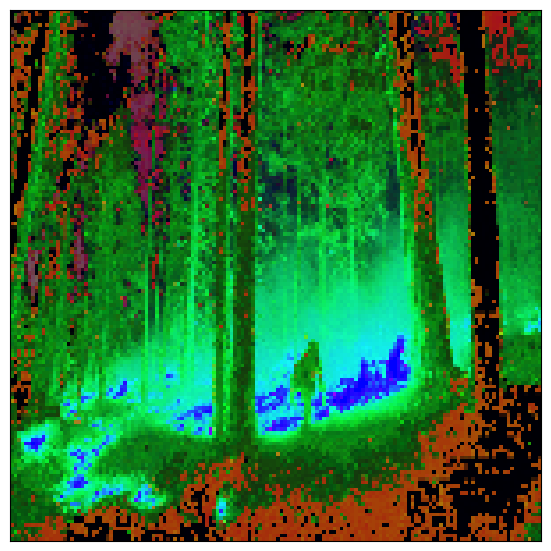

In [25]:
image_unic = load_image(file_unic)
print(image_unic)
plt.figure(figsize=(40,40))
plt.subplot(5,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image_unic)

1/1 [==============================] - 0s 203ms/step
[[1.0840323e-09 1.0000000e+00]]
[1.0840323e-09 1.0000000e+00]
1.0
1


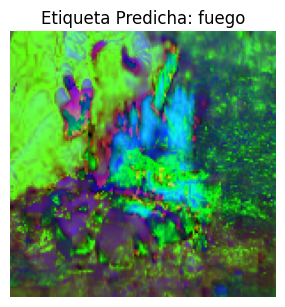

In [20]:


model = keras.models.load_model('modelo_fuego_hsv.h5')
pred = model.predict(np.array([image_unic]))

print(pred)
print(pred[0])
print(np.sum(pred))
print(np.argmax(pred))

plt.figure(figsize=(20,20))
for i, (probabilidad) in enumerate(zip(pred)):
    plt.subplot(5,5,i+1)
    plt.imshow(image_unic)
    plt.title(f'Etiqueta Predicha: {class_name[np.argmax(probabilidad)]}')
    plt.axis('off')

plt.show()